In [30]:
#import the important libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
from sklearn import datasets
from sklearn.metrics import classification_report
%matplotlib inline

### Fetch the dataset



In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces() # download the dataset at ~/scikit_learn_data
print("Keys:", faces.keys()) # display keys
print("Total samples and image size:", faces.images.shape)
print("Total samples and features:", faces.data.shape)
print("Total samples and targets:", faces.target.shape)



Keys: dict_keys(['data', 'images', 'target', 'DESCR'])
Total samples and image size: (400, 64, 64)
Total samples and features: (400, 4096)
Total samples and targets: (400,)


In [33]:
print(faces.images[0].shape)
print(faces.data[0].shape)
print(faces.target[0].size)

(64, 64)
(4096,)
1


In [34]:
print(faces.images[0])

[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


In [35]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [36]:
olive = datasets.fetch_olivetti_faces()
data = olive['data']
images = olive['images']
target = olive['target']

In [37]:
print(olive['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [38]:
df=pd.DataFrame(olive['data'])
df.head(5)

0         1         2         3         4         5         6     \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

       7         8         9     ...      4086      4087      4088      4089  \
0  0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893  0.661157   
1  0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364  0.148760   
2  0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818  0.136364   
3  0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025  0.685950   
4  0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686  0.173554   

       4090      4091      4092      4093      4094      4095  
0  0.475207  0.132231  0.148760  0.152893  0.161157  0.157025  
1  0.152893  0.152893  0.152893  0.152893  0.152893  0.152893  
2  0.128099  0.148760  0.144628  0.140496  0.148760  0.152893  
3  0.727273  0.743802  0.764463  0.752066  0.752066  0.739669  
4  0.177686  0.177686  0.177686  0.177686  0.173554  0.173554  

[5 rows x 4096 columns]

In [39]:
print("Total images are {}".format(len(data)))

print("Total number of targets are {}".format(len(np.unique(target))))

print("Size of each image is {}x{}".format(data.shape[0],data.shape[1]))

print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0,:1]))

print("unique target number:",np.unique(target))


Total images are 400
Total number of targets are 40
Size of each image is 400x4096
Pixel values were scaled to [0,1] interval. e.g:[0.30991736]
unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


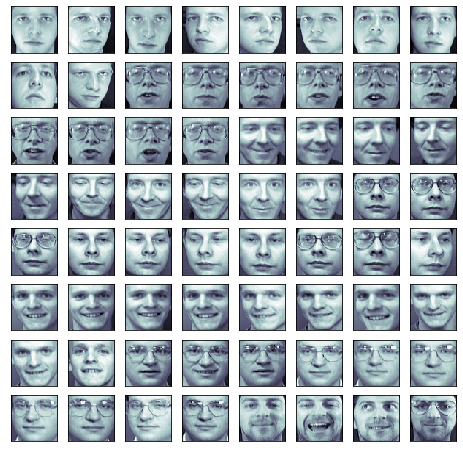

In [40]:
#visualise the images
fig = plt.figure(figsize=(8, 8)) # create a new figure window
# plot several images
for i in range(64): 
    # subplot : 8 rows and 8 columns
    img_grid = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # plot features as image
    img_grid.imshow(images[i], cmap=plt.cm.bone)

plt.show()

### PCA model creation

In [41]:
#First split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

print(X_train.shape, X_test.shape)


(300, 4096) (100, 4096)


In [54]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

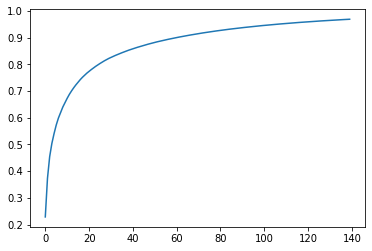

In [55]:
Pca = decomposition.PCA(n_components = 140).fit(X_train)

plt.plot(np.cumsum(Pca.explained_variance_ratio_))

plt.show()


#show the eigen_faces(Pca)

In [56]:
print(pca.components_.shape)

(150, 4096)


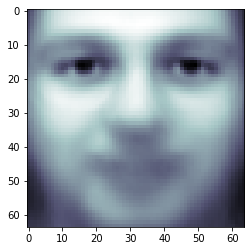

In [57]:
#PCA can that it computes the “mean” face, which can be interesting to examine:
plt.imshow(pca.mean_.reshape(images[0].shape),
           cmap=plt.cm.bone)

In [58]:
from sklearn import svm
x_train_pca = Pca.transform(X_train)
x_test_pca = Pca.transform(X_test)
clf = svm.SVC(kernel='rbf', C=1000, gamma=0.01)
clf = clf.fit(x_train_pca, y_train)

y_pred = clf.predict(x_test_pca)

print('Classification report\n',classification_report(y_test,y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       0.67      0.67      0.67         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
    